In [25]:
import graphviz

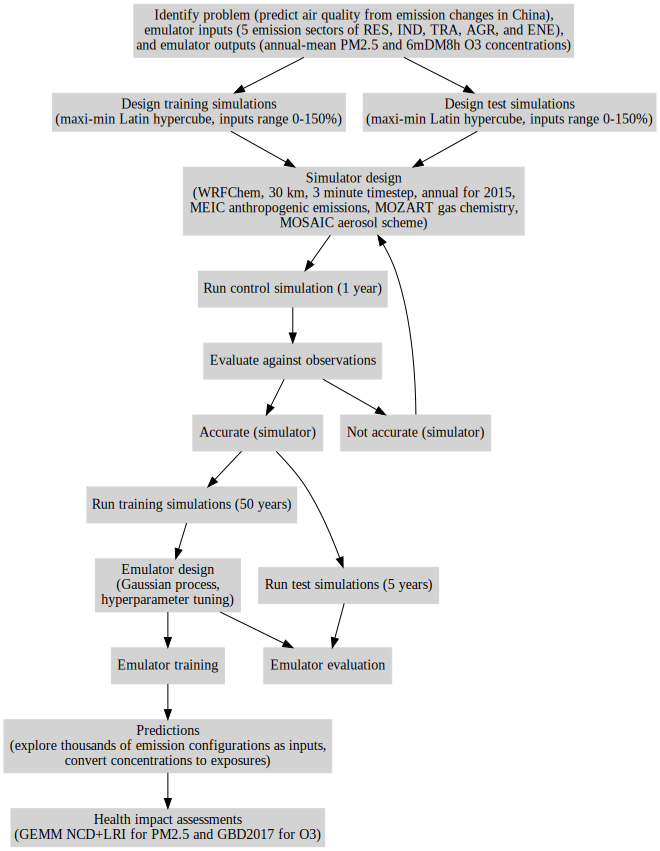

In [107]:
g = graphviz.Digraph(
    'G', 
    filename='dag', 
    node_attr={
        'color': 'lightgrey', 
        'style': 'filled',
        'shape': 'rectangle'
    }
)

g.edge('Simulator design\n (WRFChem, 30 km, 3 minute timestep, annual for 2015,\nMEIC anthropogenic emissions, MOZART gas chemistry, \nMOSAIC aerosol scheme)', 'Run control simulation (1 year)')
g.edge('Run control simulation (1 year)', 'Evaluate against observations')
g.edge('Evaluate against observations', 'Not accurate (simulator)')
g.edge('Not accurate (simulator)', 'Simulator design\n (WRFChem, 30 km, 3 minute timestep, annual for 2015,\nMEIC anthropogenic emissions, MOZART gas chemistry, \nMOSAIC aerosol scheme)')
g.edge('Evaluate against observations', 'Accurate (simulator)')
g.edge('Accurate (simulator)', 'Run training simulations (50 years)')
g.edge('Accurate (simulator)', 'Run test simulations (5 years)')

g.edge('Identify problem (predict air quality from emission changes in China),\nemulator inputs (5 emission sectors of RES, IND, TRA, AGR, and ENE),\nand emulator outputs (annual-mean PM2.5 and 6mDM8h O3 concentrations)', 'Design training simulations\n(maxi-min Latin hypercube, inputs range 0-150%)')
g.edge('Identify problem (predict air quality from emission changes in China),\nemulator inputs (5 emission sectors of RES, IND, TRA, AGR, and ENE),\nand emulator outputs (annual-mean PM2.5 and 6mDM8h O3 concentrations)', 'Design test simulations\n(maxi-min Latin hypercube, inputs range 0-150%)')

g.edge('Design training simulations\n(maxi-min Latin hypercube, inputs range 0-150%)', 'Simulator design\n (WRFChem, 30 km, 3 minute timestep, annual for 2015,\nMEIC anthropogenic emissions, MOZART gas chemistry, \nMOSAIC aerosol scheme)')
g.edge('Design test simulations\n(maxi-min Latin hypercube, inputs range 0-150%)', 'Simulator design\n (WRFChem, 30 km, 3 minute timestep, annual for 2015,\nMEIC anthropogenic emissions, MOZART gas chemistry, \nMOSAIC aerosol scheme)')

# g.edge('Simulator design\n (WRFChem, 30 km, 3 minute timestep, annual 2015, MEIC, MOZART, MOSAIC)', 'Run training simulations (50 years)')
# g.edge('Simulator design\n (WRFChem, 30 km, 3 minute timestep, annual 2015, MEIC, MOZART, MOSAIC)', 'Run test simulations (5 years)')

g.edge('Run training simulations (50 years)', 'Emulator design\n(Gaussian process, \nhyperparameter tuning)')
g.edge('Emulator design\n(Gaussian process, \nhyperparameter tuning)', 'Emulator training')

g.edge('Run test simulations (5 years)', 'Emulator evaluation')
g.edge('Emulator design\n(Gaussian process, \nhyperparameter tuning)', 'Emulator evaluation')
# g.edge('Emulator design\n(Gaussian process, \nhyperparameter tuning)', 'Accurate (emulators)')
# g.edge('Emulator design\n(Gaussian process, \nhyperparameter tuning)', 'Not accurate (emulators)')

g.edge('Emulator training', 'Predictions\n(explore thousands of emission configurations as inputs, \nconvert concentrations to exposures)')
g.edge('Predictions\n(explore thousands of emission configurations as inputs, \nconvert concentrations to exposures)', 'Health impact assessments\n(GEMM NCD+LRI for PM2.5 and GBD2017 for O3)')

g

In [83]:
g.view()

'dag.pdf'

Error: no "view" rule for type "application/pdf" passed its test case
       (for more information, add "--debug=1" on the command line)
